![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39117173-a433bf6a-46e6-11e8-8a40-b4d4d6422493.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Intro to Data Cleaning

While working with real-world data, we often will find missing values.

In this lecture we'll try to understand that data can have missing values for a number of reasons such as observations that were not recorded and data corruption.

Once we detect a missing value, the handling process of these data will be important to fix that data and make it consistent and usable, as many metrics and machine learning algorithms will not support our data if it has missing values.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## What is "missing data"?

What "missing data" is depends on the origin of the data and the context it was generated. For example:

- for a survey, a _`Salary`_ field with an empty value, or a number 0, or an invalid value (a string for example) can be considered "missing data".
- an `Email` field without a "@" or a valid domain name, also can be considered missing or invalid data.

With this in mind, we'll analyze the following DataFrame with census information and try to discover inconsistent values:

In [2]:
df = pd.read_csv('data/adult-small.csv')

df.head(10)

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
1,10002,38,Private,HS-grad,NaN,Handlers-cleaners,8,40,United-States
2,10003,NaN,Private,?,NaN,Handlers-cleaners,8,40,Africa
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba
5,10006,NO,Private,Masters,Married-civ-spouse,NaN,F,40,United-States
6,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica
7,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica
8,10008,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,M,45,United-States
9,10009,31,Private,Masters,Never-married,Prof-specialty,F,50,United-States


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Missing values

The most common appearance of missing values is -as it name said- while there is no value at all.

As we are working with `pandas` library, it will show us `NaN` values where there is no value. Can you see any `NaN` value on the data we just loaded?

In [3]:
df['age'].unique()

array(['50', '38', nan, '53', '28', 'NO', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', '25', '43', '54', '274', 'DK', '56', '19',
       '39', '20', '45', '22', '48', '24', '57', '44', '41', '29', '18',
       '47', '2', '46', '35', '306', '36', '79', '27', '67'], dtype=object)

In [4]:
df['sex'].unique()

array(['M', '8', nan, 'F', 'O', 'DK', '0', 'P'], dtype=object)

We can also see how many missing values per column we have:

In [5]:
df.isna().sum()

unique_id         0
age               1
workclass         4
education         3
marital-status    6
occupation        4
sex               2
hours-per-week    1
native-country    6
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Duplicated values

Duplicated records are also known as missing data. We need to remove any duplicate row we have to make our data consistent and unbiased.

In [6]:
df.duplicated().sum()

2

In [7]:
df[df.duplicated()]

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
7,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica
15,10014,32,Private,Assoc-acdm,Never-married,Sales,M,50,United-States


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Invalid types

Another common type of of missing values are invalid types.

For example:
- `age` and `hours-per-week` columns: we expect to have numeric type values on every row.
- `sex` and `occupation` columns: we expect to have string type values on every row.

### hours-per-week

We can see we have some <b>NO</b>, <b>DK</b> and <b>?</b> non-numeric values, which means we have invalid type values on our column.

In [8]:
df['hours-per-week'].unique()

array(['NO', '40', '9356', '16', '45', '50', '30', 'DK', '35', '60', '?',
       '52', '44', nan, '15', '25', '38', '43', '7346', '55', '48', '0',
       '58', '32', '70', '20', '22'], dtype=object)

In [9]:
df['hours-per-week'].str.isnumeric().value_counts(dropna=False)

True     77
False     8
NaN       1
Name: hours-per-week, dtype: int64

### age

We see that on this column we also have non-numeric values, which in this case are invalid type values.

In [10]:
df['age'].unique()

array(['50', '38', nan, '53', '28', 'NO', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', '25', '43', '54', '274', 'DK', '56', '19',
       '39', '20', '45', '22', '48', '24', '57', '44', '41', '29', '18',
       '47', '2', '46', '35', '306', '36', '79', '27', '67'], dtype=object)

In [11]:
df['age'].str.isnumeric().value_counts(dropna=False)

True     79
False     6
NaN       1
Name: age, dtype: int64

### sex

We expect all values to be <b>M</b> (male), <b>F</b> (female) or <b>O</b> (other), but we see that on this column we also some numeric values (0 and 8) which are invalid type values.

In [12]:
df['sex'].unique()

array(['M', '8', nan, 'F', 'O', 'DK', '0', 'P'], dtype=object)

In [13]:
df['sex'].value_counts(dropna=False)

M      52
F      20
O       5
8       3
0       2
NaN     2
DK      1
P       1
Name: sex, dtype: int64

### occupation

We see that we have some numeric type values here, which are invalid type values.

In [14]:
df['occupation'].unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', nan,
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Machine-op-inspct', 'Farming-fishing', '3',
       'Tech-support', '?', 'Protective-serv', '0'], dtype=object)

In [15]:
df['occupation'].value_counts(dropna=False)

Exec-managerial      12
Prof-specialty       12
Sales                 9
Other-service         8
Adm-clerical          8
Craft-repair          6
Machine-op-inspct     6
?                     5
Tech-support          4
Handlers-cleaners     4
NaN                   4
Transport-moving      3
Farming-fishing       2
3                     1
Protective-serv       1
0                     1
Name: occupation, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Invalid values

Finally we can find invalid values on our data, which means values that probably have correct value type, but don't fit within the domain of our data.

For example:
- `age` column: we expect people to have +18 years old.
- `hours-per-week` columns: we expect people working +0 hours per week.
- `sex` column: we expect "M", "F" or "O" values.
- `education` column: we expect education levels (bachelor, masters, ...).
- `native-country` column: we expect country names.




Invalid values (a "D" in an M/F column, a 7 in a 1-5 ranking column)
Invalid values in domain (users age = 290, an email with an invalid domain)

### age

Here we see some wrong <b>2</b>, <b>274</b> and <b>306</b> values that have correct type but don't fit on our domain, so they are invalid values.

In [16]:
df['age'].unique()

array(['50', '38', nan, '53', '28', 'NO', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', '25', '43', '54', '274', 'DK', '56', '19',
       '39', '20', '45', '22', '48', '24', '57', '44', '41', '29', '18',
       '47', '2', '46', '35', '306', '36', '79', '27', '67'], dtype=object)

In [17]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

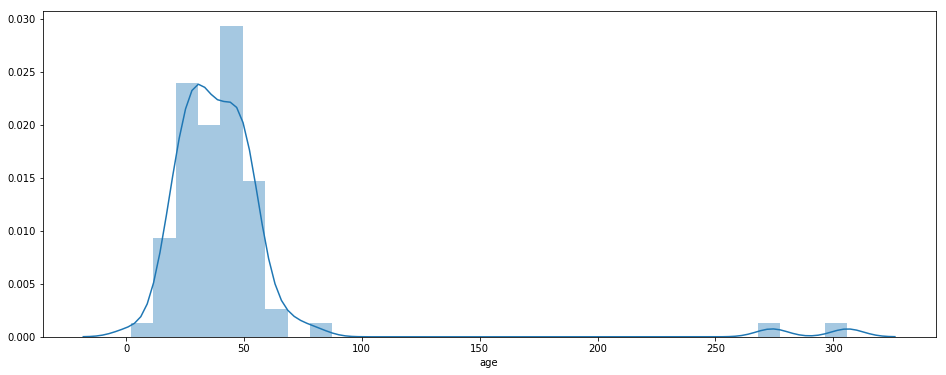

In [18]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.distplot(df['age'].dropna())

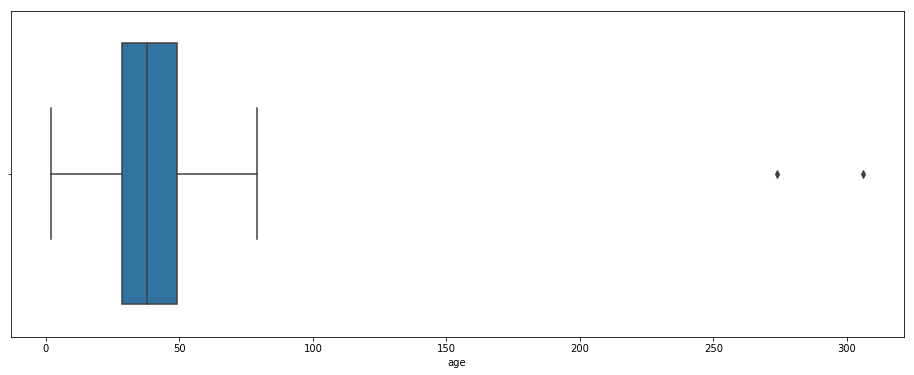

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.boxplot(df['age'].dropna())

### hours-per-week

Here we see some wrong <b>0</b>, <b>7346</b> and <b>9356</b> values that have correct type but don't fit on our domain, so they are invalid values.

In [20]:
df['hours-per-week'].unique()

array(['NO', '40', '9356', '16', '45', '50', '30', 'DK', '35', '60', '?',
       '52', '44', nan, '15', '25', '38', '43', '7346', '55', '48', '0',
       '58', '32', '70', '20', '22'], dtype=object)

In [21]:
df['hours-per-week'] = pd.to_numeric(df['hours-per-week'], errors='coerce')

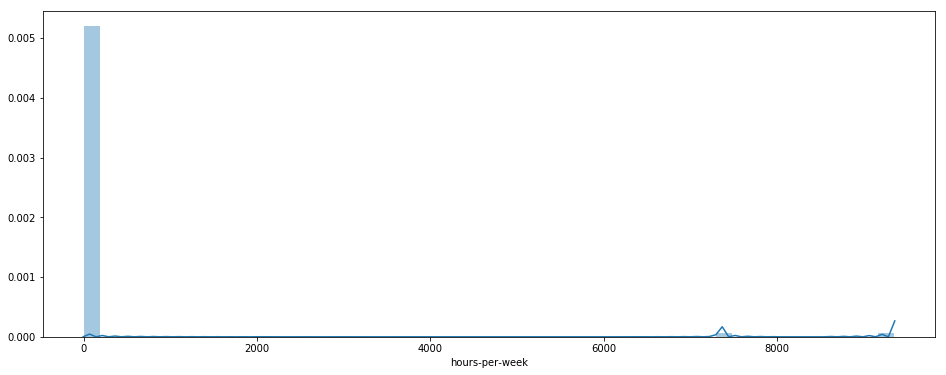

In [22]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.distplot(df['hours-per-week'].dropna())

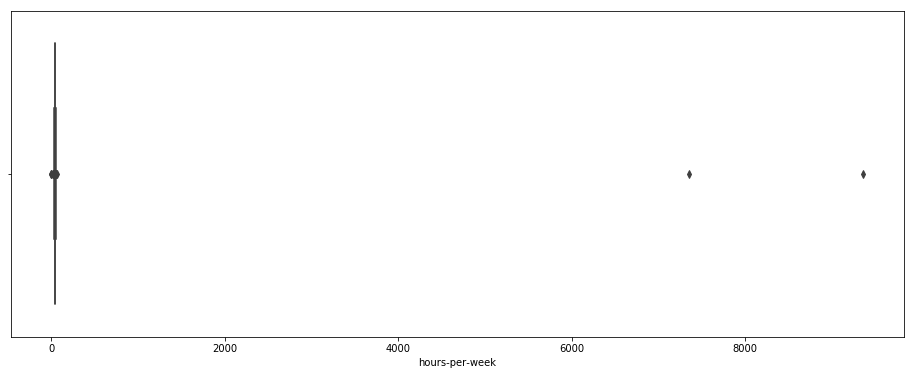

In [23]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.boxplot(df['hours-per-week'].dropna())

### sex

Here we see some invalid <b>DK</b> and <b>P</b> values that we really don't know what they mean.

In [24]:
df['sex'].unique()

array(['M', '8', nan, 'F', 'O', 'DK', '0', 'P'], dtype=object)

### education

We see that we have some <b>Actress</b> and <b>?</b> which are not valid education values.

In [25]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '?', '11th', 'Masters', '9th',
       'Some-college', 'Actress', 'Assoc-acdm', 'Assoc-voc', '7th-8th',
       nan, 'Prof-school', '5th-6th', 'Doctorate', '10th'], dtype=object)

### native-country

Taking a look at the values, we find some <b>Africa</b> and <b>?</b> values that are definitely invalid values as they are not valid country names.

In [26]:
df['native-country'].unique()

array(['United-States', 'Africa', 'Cuba', 'Jamaica', 'India', '?',
       'Mexico', nan, 'South', 'Puerto-Rico', 'Honduras'], dtype=object)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)